In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### How to Use `analyze_find_focus.ipynb`
1. Left Click the focus-data file in the VSCode explorer and select Copy Path
2. Paste Path and assign to focus_data_file
3. Run the appropriate cell to plot the intended data

In [12]:
# Paste file path

focus_data_file=r"C:\Users\spmno\OneDrive\Documents\spm\Scan\08-25-2023_focus_data_NAFT_6@1.0_a.txt"

In [13]:
# Load Single Point Focus Data
zs, ts, ch1s, ch2s, totals = np.loadtxt(focus_data_file, dtype = float, delimiter=',', unpack=True)

zs = list(zs)
ts = list(ts)
ch1s = list(ch1s)
ch2s = list(ch2s)
totals = list(totals)

ind = totals.index((max(totals)))
ind1 = ch1s.index(max(ch1s))
ind2 = ch2s.index(max(ch2s))
print('Max intensity z positions (Sum, CH1, CH2): %f, %f, %f' % (zs[ind], zs[ind1], zs[ind2]))


Max intensity z positions (Sum, CH1, CH2): 9.750029, 9.900029, 9.350029


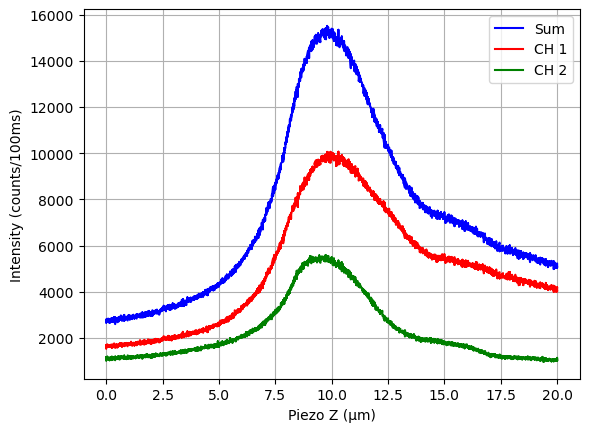

In [49]:
# Plot Single Point autofocus data

plt.plot(zs, totals, c='b', label='Sum')
plt.plot(zs, ch1s, c='r', label='CH 1')
plt.plot(zs, ch2s, c='g', label='CH 2')
plt.xlabel('Piezo Z (µm)')
plt.ylabel('Intensity (counts/100ms)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Plot Single Point manual data

plt.plot(ts, totals, c='b', label='Sum')
plt.plot(ts, ch1s, c='r', label='CH 1')
plt.plot(ts, ch2s, c='g', label='CH 2')
plt.xlabel('t (s)')
plt.ylabel('Intensity (cps)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Load Multipoint auto Focus Data
C:\Users\spmno\OneDrive\Documents\spm\Scan\08-14-2023_focus_data_AFTARGET_3_a.txt

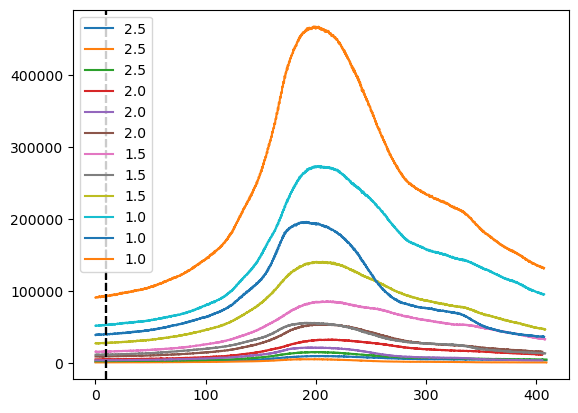

In [21]:
fn_1 = r"C:\Users\spmno\OneDrive\Documents\spm\Scan\08-25-2023_focus_data_NAFT_2@2.5_a.txt"
fn_2 = r"C:\Users\spmno\OneDrive\Documents\spm\Scan\08-25-2023_focus_data_NAFT_3@2.0_a.txt"
fn_3 = r"C:\Users\spmno\OneDrive\Documents\spm\Scan\08-25-2023_focus_data_NAFT_5@1.5_a.txt"
fn_4 = r"C:\Users\spmno\OneDrive\Documents\spm\Scan\08-25-2023_focus_data_NAFT_6@1.0_a.txt"

fns = [fn_1, fn_2, fn_3, fn_4]
filts = [2.5, 2.0, 1.5, 1.0]

zs_list, ts_list, ch1s_list, ch2s_list, totals_list = [], [], [], [], []
for i in fns:
    zs, ts, ch1s, ch2s, totals = np.loadtxt(i, dtype = float, delimiter=',', unpack=True)
    zs_list.append(zs)
    ts_list.append(ts)
    ch1s_list.append(ch1s)
    ch2s_list.append(ch2s)
    totals_list.append(totals)


1177 1240 1170
Max intensity z positions (Sum, CH1, CH2): 9.798038, 10.298038, 9.748038
1198 1275 1156
Max intensity z positions (Sum, CH1, CH2): 9.947493, 10.597493, 9.597493
1183 1241 1119
Max intensity z positions (Sum, CH1, CH2): 9.847923, 10.297923, 9.297923
1172 1192 1126
Max intensity z positions (Sum, CH1, CH2): 9.750029, 9.900029, 9.350029


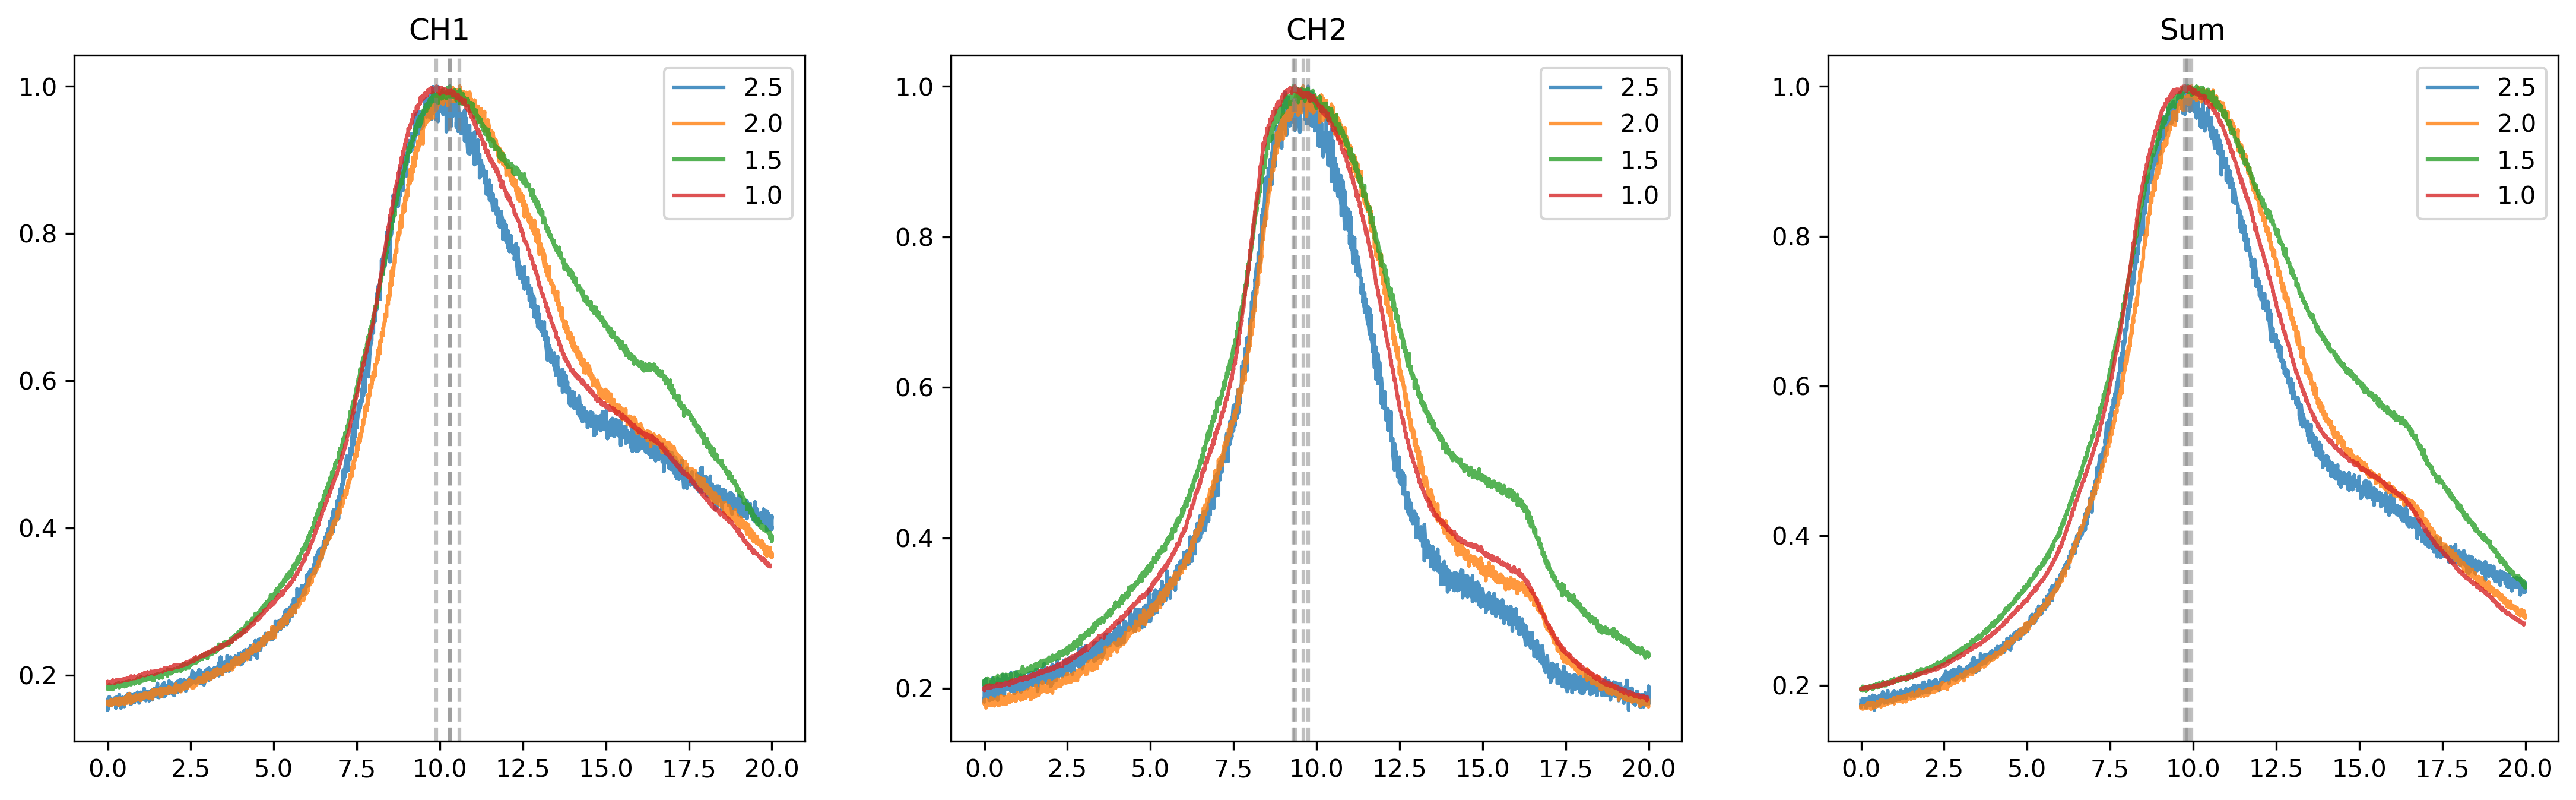

In [37]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
maxim = lambda x: np.array(x)/max(x)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i in range(len(fns)):
    ax[0].plot(zs_list[i], maxim(ch1s_list[i]), label = filts[i], alpha=0.8)
    ax[1].plot(zs_list[i], maxim(ch2s_list[i]), label = filts[i], alpha=0.8)
    ax[2].plot(zs_list[i], maxim(totals_list[i]), label = filts[i], alpha=0.8)

    ind = list(totals_list[i]).index((max(totals_list[i])))
    ind1 = list(ch1s_list[i]).index(max(ch1s_list[i]))
    ind2 = list(ch2s_list[i]).index(max(ch2s_list[i]))
    print(ind, ind1, ind2)

    print('Max intensity z positions (Sum, CH1, CH2): %f, %f, %f' % (zs_list[i][ind], zs_list[i][ind1], zs_list[i][ind2]))
    ax[0].axvline(x=zs_list[i][ind1], color='grey', linestyle='--', alpha=0.5)
    ax[1].axvline(x=zs_list[i][ind2], color='grey', linestyle='--', alpha=0.5)
    ax[2].axvline(x=zs_list[i][ind], color='grey', linestyle='--', alpha=0.5)

ax[0].set_title('CH1')
ax[1].set_title('CH2')
ax[2].set_title('Sum')
ax[0].legend()
ax[1].legend()
ax[2].legend()